# EDA  mobility
**"destino" field used to separate external /internal journeys**

## Libraries and constants.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(50,30), 'figure.dpi':100, 'font.size' : 10}) # tamño de los plots

print("Pandas", pd.__version__)
print("Numpy", np.__version__)
print("Seaborn",sns.__version__)

Pandas 1.3.5
Numpy 1.21.2
Seaborn 0.11.2


In [2]:
from IPython.core.pylabtools import figsize

In [3]:
%matplotlib inline

In [4]:
#plt.style.use('fivethirtyeight')#'seaborn')

In [5]:
box_kws = {"meanline": True, "showmeans": True, "notch": True, "orient": "h", "color": '#aabbbb'}
kde_kws = {"alpha": 0.5, "color": '#1122ff'}
hist_kws = {"alpha": 0.5, 'bins': 100, "color": '#1122ff'}
scatter_kwargs = { 'linewidth': 3, 'linestyle': '-'}#'edgecolor': "w",

## Get  data

In [6]:
####   Wherever you saved
m1 = pd.read_csv('~/Trabajo_tfm/datos_csv/datos_mitma_ext.csv', index_col='Unnamed: 0') # iter 0) 
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 0 to 7076
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 7077 non-null   object 
 1   provincia             7077 non-null   object 
 2   v_muy_cortos          7077 non-null   float64
 3   v_cortos              7077 non-null   float64
 4   v_medios              7077 non-null   float64
 5   v_largos              7077 non-null   float64
 6   v_muy_largos          7077 non-null   float64
 7   v_extra_largos        7077 non-null   float64
 8   v_noche               7077 non-null   float64
 9   v_madrugada           7077 non-null   float64
 10  v_mañana              7077 non-null   float64
 11  v_mediodia            7077 non-null   float64
 12  v_sobremesa           7077 non-null   float64
 13  v_tarde               7077 non-null   float64
 14  v_km_muy_cortos       7077 non-null   float64
 15  v_km_cortos          

In [7]:
#m1 = m1.drop(columns = ['Unnamed: 0'])

In [8]:
contenedor = m1['fecha']
m1['fecha'] = pd.to_datetime(contenedor)
m1.set_index('fecha', inplace=True)
# tarjeta.index #check datatype of index

## Exploration Data Analisys

In [9]:
columnas = m1.columns[1:].tolist()
#columnas

num_atributos = m1.columns.size-1 # provincia
print (num_atributos)

52


In [10]:
count = 0

fig, axes = plt.subplots(num_atributos,3 , figsize=(50, 250), dpi=100)

for atributo in columnas :
    
    fig.figsize=(18, 20)
    sns.boxplot(ax=axes[count, 0], data=m1, x=m1[atributo], y="provincia",  palette="Set1", orient= "h")
    sns.boxplot(ax=axes[count, 1], data=m1, x=m1[atributo], **box_kws)
    sns.histplot(ax=axes[count, 2],data=m1[atributo], kde=True,  **hist_kws)
    plt.subplots_adjust(top=1.92, bottom=0.28, left=0.10, right=0.95, hspace=0.55, wspace=0.45)
    count +=1

plt.show()

plt.close()


**Most of the outliers belong to Madrid because of its population.**


**Zaragoza province has a very well defined outliers in m2 group,people who did cero, 1, 2 or more travels.**


----

Zooming into m2 group and long trips :

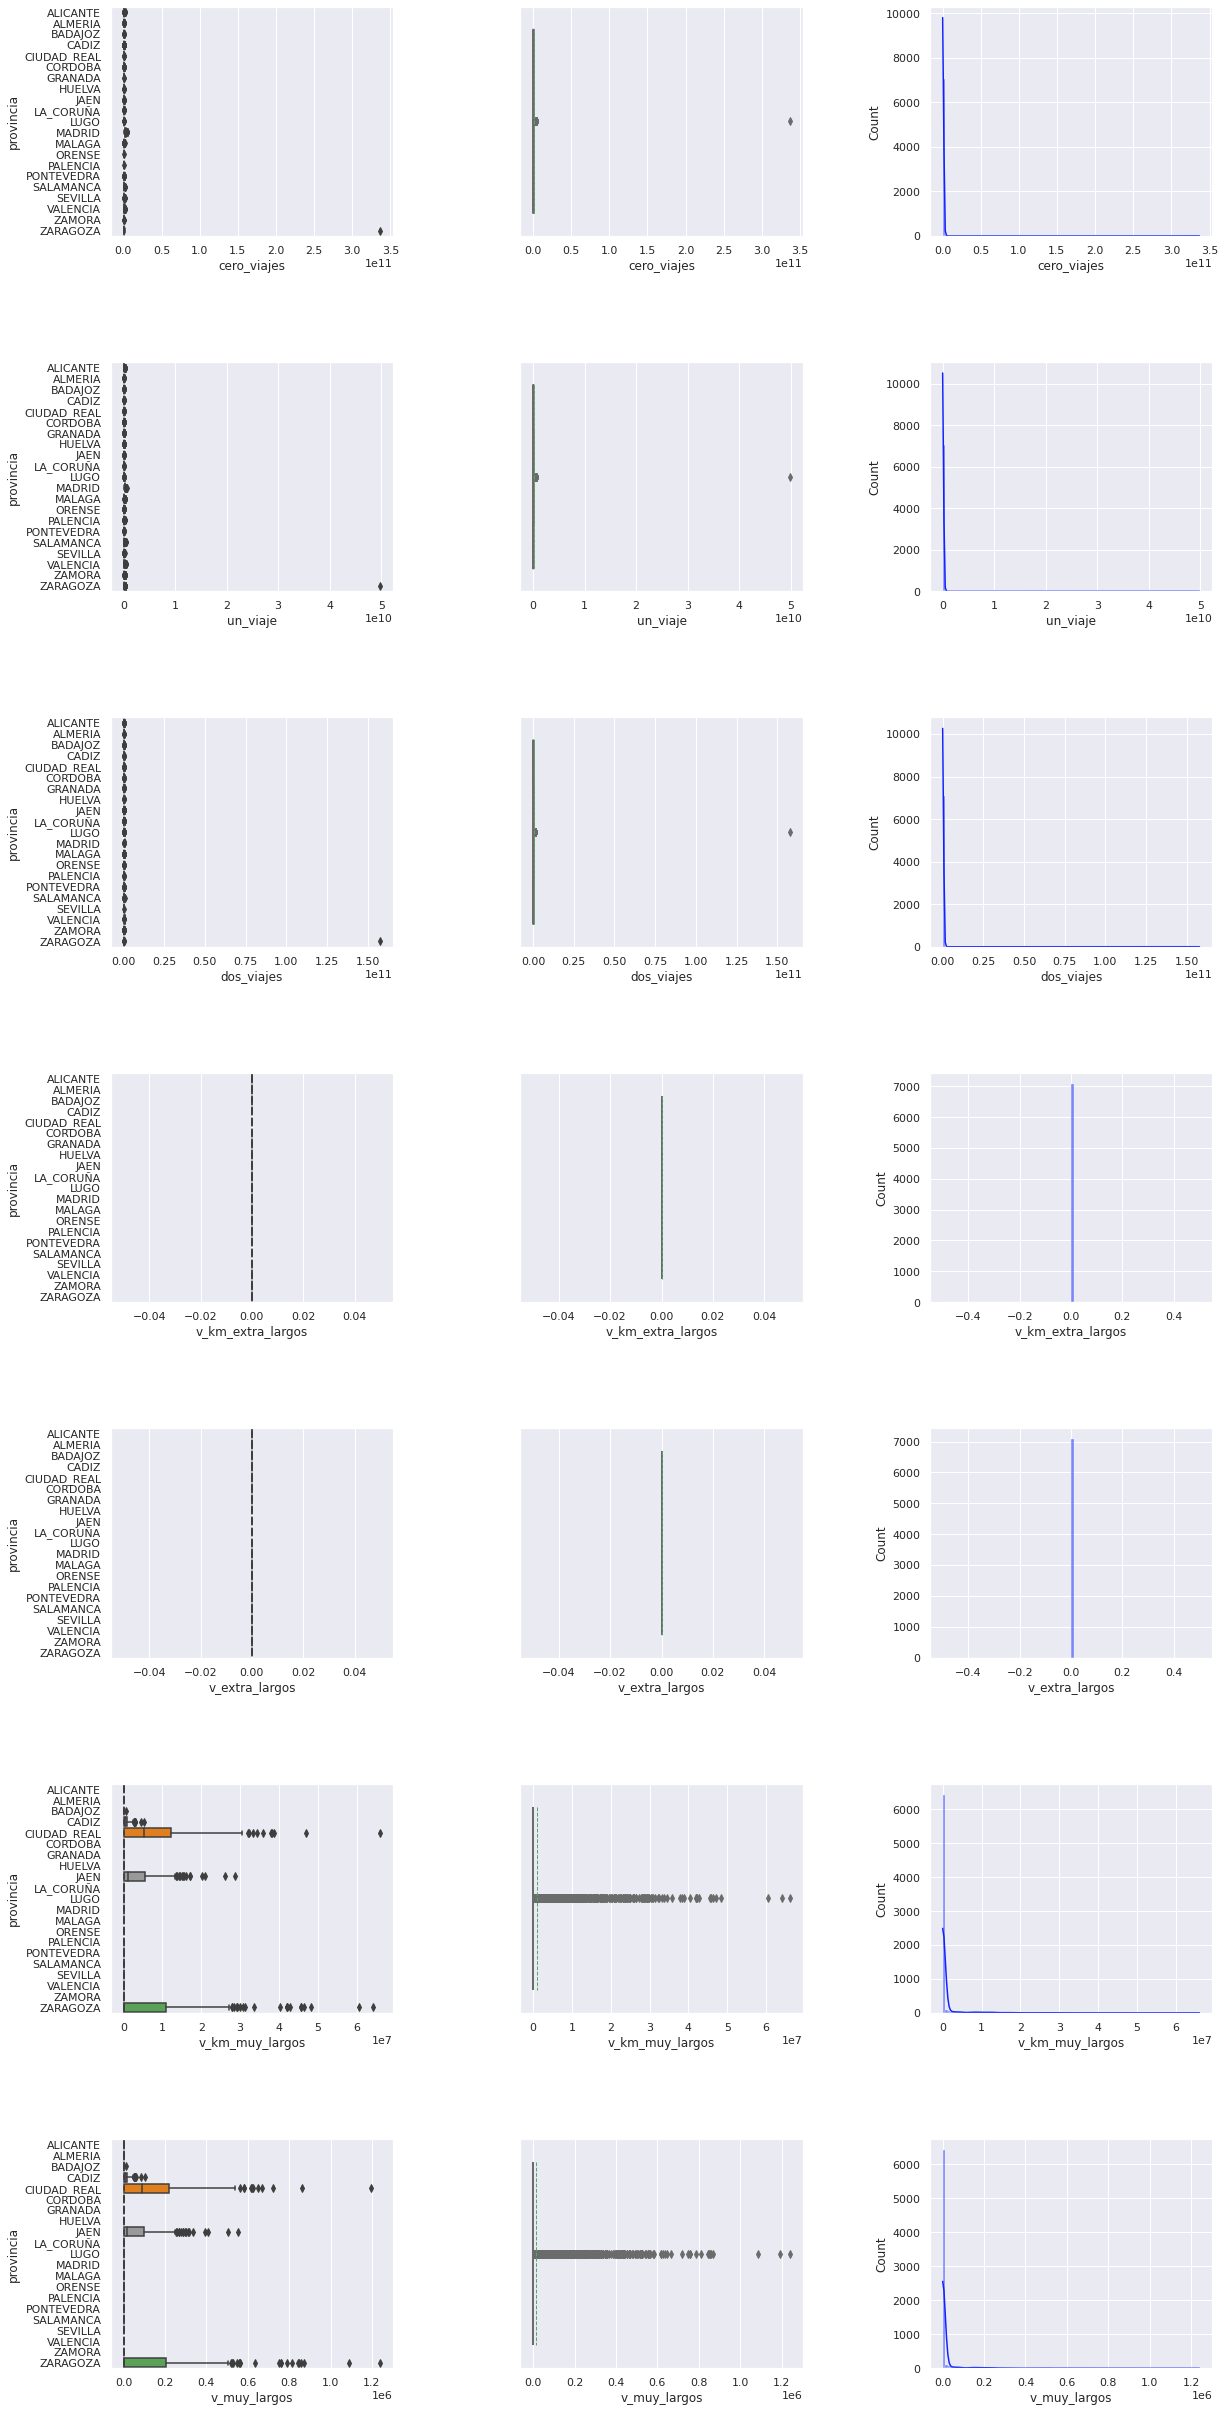

In [11]:
fig, axes = plt.subplots(7, 3, figsize=(18, 20)) 
 
#fig.suptitle('M2 people dataset anomalies')

sns.boxplot(ax=axes[0, 0], data=m1, x='cero_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[0, 1], data=m1, x=m1.cero_viajes, **box_kws)
sns.histplot(ax=axes[0, 2],data= m1.cero_viajes, kde=True,  **hist_kws)

sns.boxplot(ax=axes[1, 0], data=m1, x='un_viaje', y="provincia", palette="Set1", orient= "h")
sns.boxplot(ax=axes[1, 1], data=m1, x=m1.un_viaje, **box_kws)
sns.histplot(ax=axes[1, 2],data= m1.un_viaje, kde=True,  **hist_kws)

sns.boxplot(ax=axes[2, 0], data=m1, x='dos_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[2, 1], data=m1, x=m1.dos_viajes, **box_kws)
sns.histplot(ax=axes[2, 2],data= m1.dos_viajes, kde=True,  **hist_kws)

sns.boxplot(ax=axes[3, 0], data=m1, x='v_km_extra_largos', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[3, 1], data=m1, x=m1.v_km_extra_largos, **box_kws)
sns.histplot(ax=axes[3, 2],data= m1.v_km_extra_largos, kde=True,  **hist_kws)

sns.boxplot(ax=axes[4, 0], data=m1, x='v_extra_largos', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[4, 1], data=m1, x=m1.v_extra_largos, **box_kws)
sns.histplot(ax=axes[4, 2],data= m1.v_extra_largos, kde=True,  **hist_kws)

sns.boxplot(ax=axes[5, 0], data=m1, x='v_km_muy_largos', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[5, 1], data=m1, x=m1.v_km_muy_largos, **box_kws)
sns.histplot(ax=axes[5, 2],data= m1.v_km_muy_largos, kde=True,  **hist_kws)

sns.boxplot(ax=axes[6, 0], data=m1, x='v_muy_largos', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[6, 1], data=m1, x=m1.v_muy_largos, **box_kws)
sns.histplot(ax=axes[6, 2],data= m1.v_muy_largos, kde=True,  **hist_kws)

plt.subplots_adjust(top=1.92, bottom=0.28, left=0.10, right=0.95, hspace=0.55, wspace=0.45)
plt.show();

In [12]:
m1[[ 'cero_viajes', 'un_viaje', 'dos_viajes','mas_de_dos_viajes',
    'v_muy_largos','v_extra_largos', 'v_km_muy_largos', 'v_km_extra_largos' ]].describe().T

count          mean           std          min  \
cero_viajes        7077.0  7.842360e+08  4.030131e+09  143293973.0   
un_viaje           7077.0  9.820675e+07  5.956137e+08   15378880.0   
dos_viajes         7077.0  3.364074e+08  1.885345e+09   58978114.0   
mas_de_dos_viajes  7077.0  5.791763e+08  3.465265e+09   77994703.0   
v_muy_largos       7077.0  1.607950e+04  7.338077e+04          0.0   
v_extra_largos     7077.0  0.000000e+00  0.000000e+00          0.0   
v_km_muy_largos    7077.0  8.783862e+05  4.022425e+06          0.0   
v_km_extra_largos  7077.0  0.000000e+00  0.000000e+00          0.0   

                           25%          50%          75%           max  
cero_viajes        407032692.0  606582385.0  887233920.0  3.367947e+11  
un_viaje            46010389.0   68018107.0  105636338.0  4.982212e+10  
dos_viajes         178578375.0  244136249.0  391135542.0  1.577555e+11  
mas_de_dos_viajes  266790212.0  412728171.0  619508696.0  2.895853e+11  
v_muy_largos               0.0          0.0          0.0  1.240320e+06  
v_extra_largos             0.0          0.0          0.0  0.000000e+00  
v_km_muy_largos            0.0          0.0          0.0  6.611160e+07  
v_km_extra_largos          0.0          0.0          0.0  0.000000e+00

## Outliers

 Z-score is used to identify ouliers.
 
 Any point whose Z-score score is outside 3rd standard deviation is atypical.



In [13]:
tabla_ = []

for columna in m1.columns:

    if m1[columna].dtype != 'object' :
        num_outliers = 0

        #print(columna)
        dato = m1[columna]
        data = sorted(dato)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        #print("Cuartiles: ", q1, q3)
        IQR = q3-q1
        umbral_inferior = q1-(1.5*IQR)
        umbral_superior = q3+(1.5*IQR)
        for i in data:
        
            if (i < umbral_inferior or i > umbral_superior):
                num_outliers += 1
    
        tabla_.append([columna, num_outliers, num_outliers/len(data)*100,
                           umbral_superior, m1[dato > umbral_superior].provincia.unique(),
                           umbral_inferior, m1[dato < umbral_inferior].provincia.unique()])

tabla_outliers = pd.DataFrame(tabla_,
                                  columns=['Variable', 'Quantity', 'Percent', 'threshold_sup', 'Provinces_sup',
                                           'threshold_inf', 'Provinces_inf'])


In [14]:
tabla_outliers

Variable  Quantity    Percent  threshold_sup  \
0           v_muy_cortos       336   4.747774   2.691451e+09   
1               v_cortos       289   4.083651   1.540149e+09   
2               v_medios       452   6.386887   4.771512e+08   
3               v_largos       659   9.311855   2.974102e+08   
4           v_muy_largos       750  10.597711   0.000000e+00   
5         v_extra_largos         0   0.000000   0.000000e+00   
6                v_noche       370   5.228204   3.369630e+08   
7            v_madrugada       408   5.765155   3.949639e+08   
8               v_mañana       335   4.733644   8.930649e+08   
9             v_mediodia       336   4.747774   1.093264e+09   
10           v_sobremesa       336   4.747774   9.720208e+08   
11               v_tarde       336   4.747774   8.089916e+08   
12       v_km_muy_cortos       336   4.747774   3.182238e+09   
13           v_km_cortos       280   3.956479   4.779156e+09   
14           v_km_medios       450   6.358627   3.324148e+09   
15           v_km_largos       716  10.117281   4.249137e+09   
16       v_km_muy_largos       750  10.597711   0.000000e+00   
17     v_km_extra_largos         0   0.000000   0.000000e+00   
18            v_km_noche       436   6.160803   8.556879e+08   
19        v_km_madrugada       406   5.736894   1.377387e+09   
20           v_km_mañana       292   4.126042   2.844622e+09   
21         v_km_mediodia       306   4.323866   3.394406e+09   
22        v_km_sobremesa       280   3.956479   3.030219e+09   
23            v_km_tarde       343   4.846686   2.200625e+09   
24       vext_muy_cortos       673   9.509679   2.218200e+08   
25           vext_cortos       659   9.311855   7.238325e+08   
26           vext_medios       455   6.429278   1.171207e+09   
27           vext_largos       567   8.011869   1.732135e+09   
28       vext_muy_largos       636   8.986859   2.106946e+08   
29     vext_extra_largos       545   7.701003   1.245904e+08   
30            vext_noche       562   7.941218   2.441156e+08   
31        vext_madrugada       444   6.273845   4.825984e+08   
32           vext_mañana       512   7.234704   8.392286e+08   
33         vext_mediodia       536   7.573831   9.808730e+08   
34        vext_sobremesa       519   7.333616   9.221339e+08   
35            vext_tarde       516   7.291225   6.417494e+08   
36    vext_km_muy_cortos       673   9.509679   3.211359e+08   
37        vext_km_cortos       651   9.198813   2.525858e+09   
38        vext_km_medios       454   6.415148   8.512765e+09   
39        vext_km_largos       506   7.149922   3.610218e+10   
40    vext_km_muy_largos       603   8.520560   1.439971e+10   
41  vext_km_extra_largos       576   8.139042   2.716854e+10   
42         vext_km_noche       756  10.682493   4.277115e+09   
43     vext_km_madrugada       576   8.139042   1.315751e+10   
44        vext_km_mañana       521   7.361877   1.976619e+10   
45      vext_km_mediodia       665   9.396637   2.030812e+10   
46     vext_km_sobremesa       655   9.255334   1.961787e+10   
47         vext_km_tarde       564   7.969479   1.016809e+10   
48           cero_viajes       404   5.708634   1.607536e+09   
49              un_viaje       569   8.040130   1.950753e+08   
50            dos_viajes       475   6.711884   7.099713e+08   
51     mas_de_dos_viajes       524   7.404267   1.148586e+09   

                                        Provinces_sup  threshold_inf  \
0                                            [MADRID]  -1.142316e+09   
1                                            [MADRID]  -6.313639e+08   
2                          [MADRID, MALAGA, ZARAGOZA]  -5.365357e+07   
3     [MADRID, SALAMANCA, ZAMORA, ZARAGOZA, PALENCIA]  -1.044237e+08   
4       [CADIZ, CIUDAD_REAL, JAEN, ZARAGOZA, BADAJOZ]   0.000000e+00   
5                                                  []   0.000000e+00   
6          [MADRID, VALENCIA, SEVILLA, MALAGA, CADIZ]  -1.133171e+08   
7                [MADRID, MALAGA, VALENCIA, ZAR

    Change values for m2 data, people who have done cero, 1,2 or more travels in the province of Zaragoza.

    These values are substituted with median value of the distribution:

In [15]:
tabla_ = []
# Iteration over columns
for columna in list(m1[['cero_viajes', 'un_viaje','dos_viajes','mas_de_dos_viajes']]):
    for provin in ['ZARAGOZA'] :
        outliers = []
        dato = m1[m1.provincia == provin][columna] 
        data = sorted(dato)
        # cuartiles
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        IQR = q3-q1
    
        umbral_inferior = q1-(1.5*IQR)
        umbral_superior = q3+(1.5*IQR)
        for i in data:
            if (i < umbral_inferior or i > umbral_superior):
                outliers.append(i)

        median = np.median(dato)  ##
        for i in outliers:
            m1.loc[m1.provincia == provin, columna] = np.where(dato == i, median,
                                                            m1.loc[m1.provincia == provin, columna])

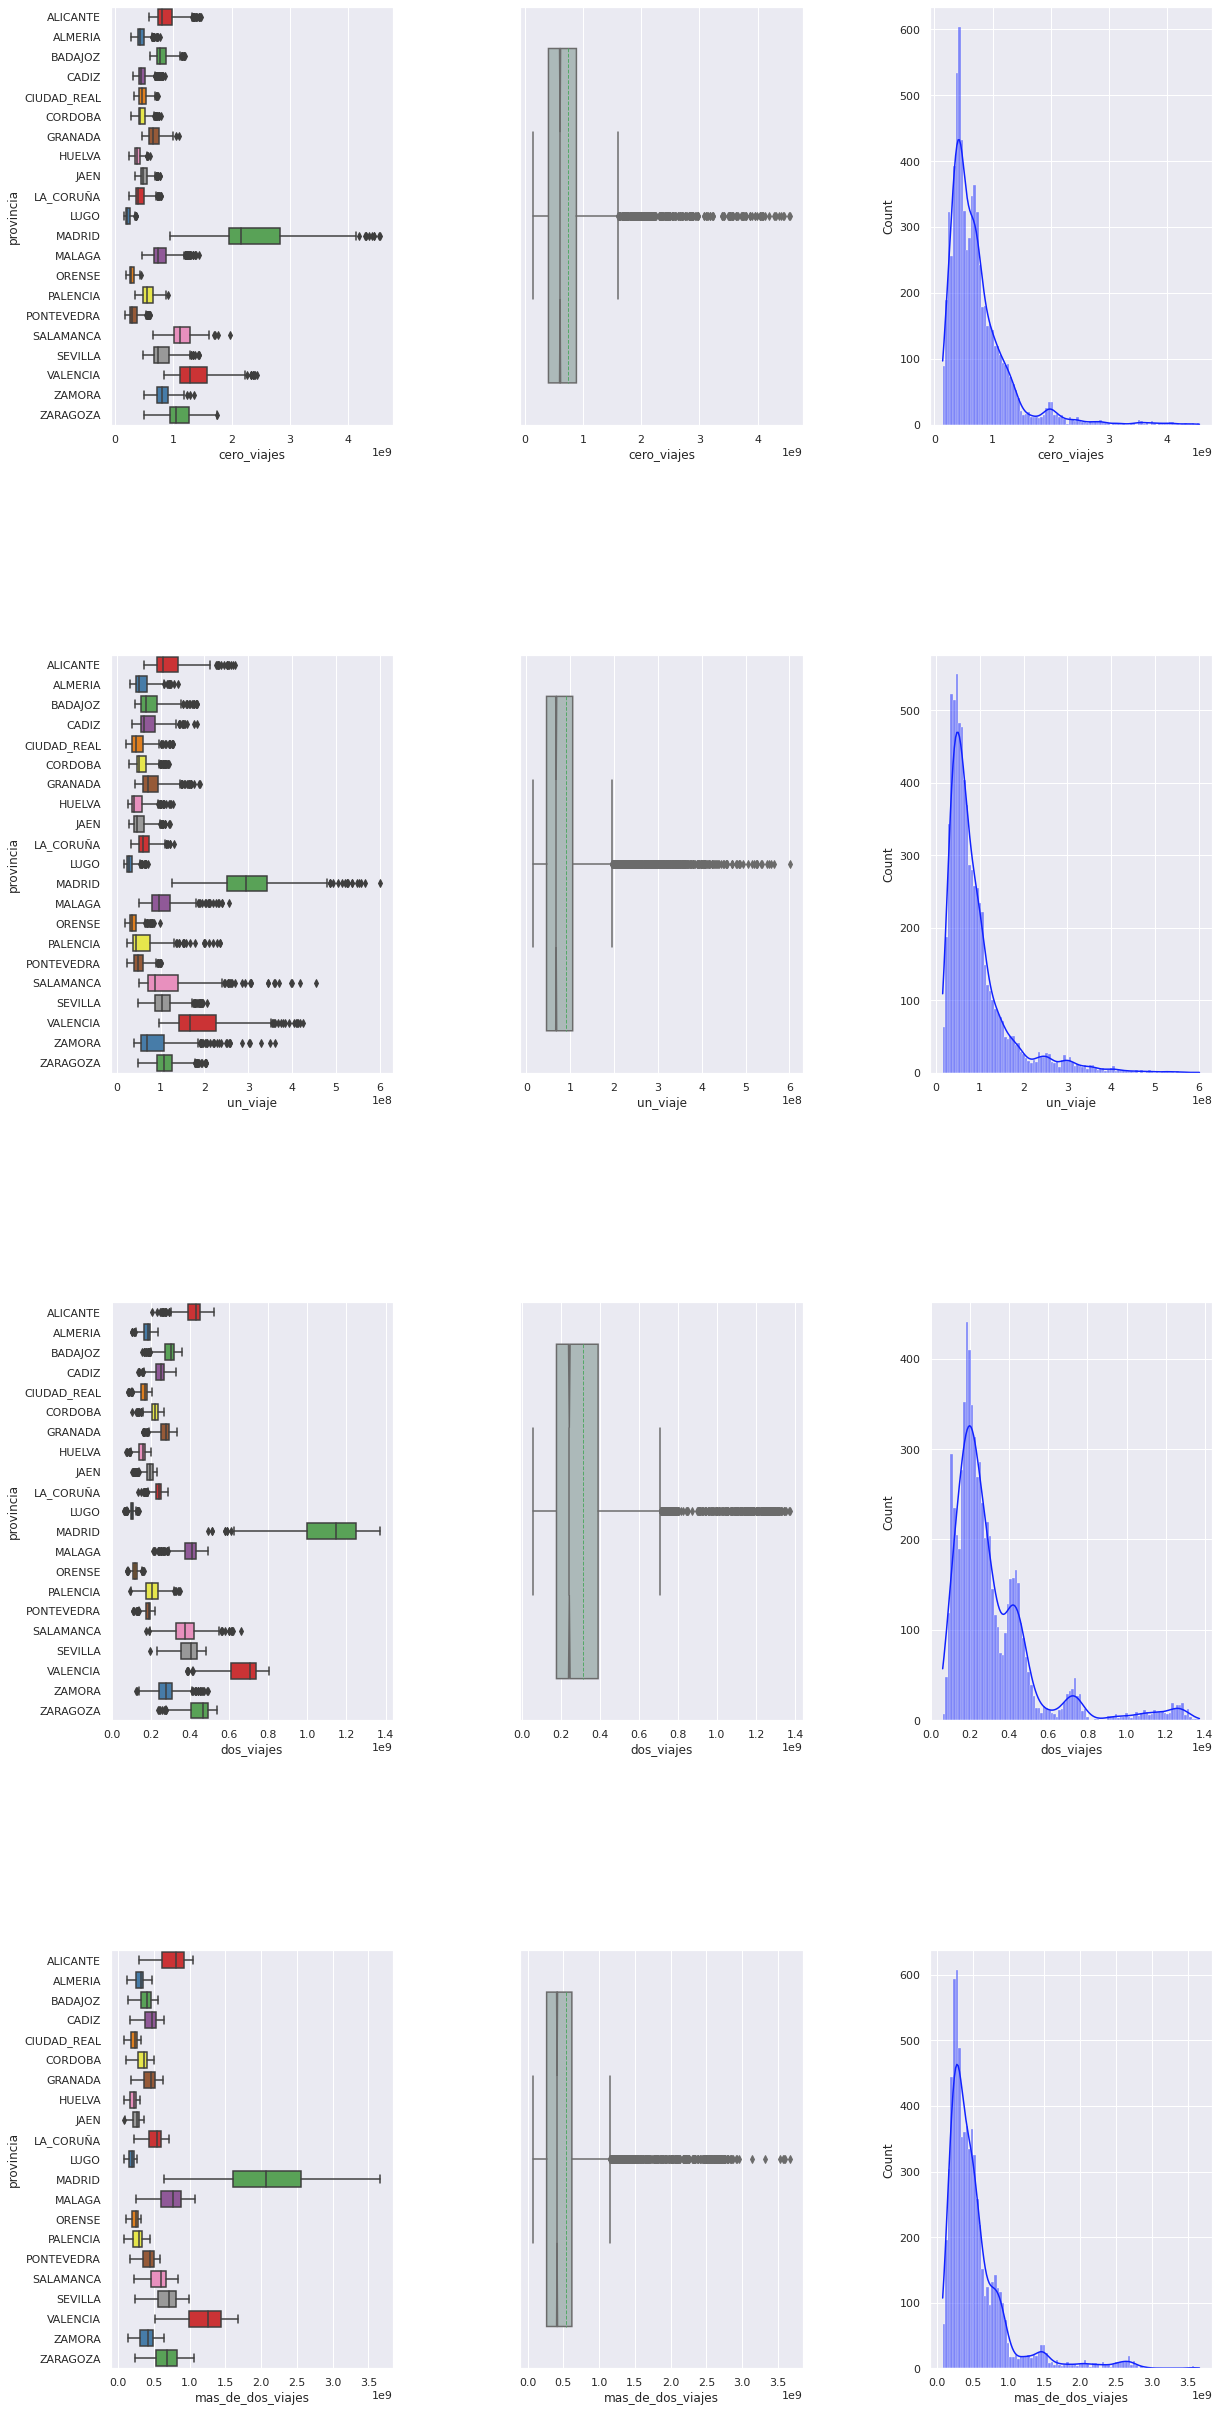

In [16]:
# Visual inspection of corrected outliers

fig, axes = plt.subplots(4, 3, figsize=(18, 20)) 
 
#fig.suptitle('M2 people dataset anomalies')

sns.boxplot(ax=axes[0, 0], data=m1, x='cero_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[0, 1], data=m1, x=m1.cero_viajes, **box_kws)
sns.histplot(ax=axes[0, 2],data= m1.cero_viajes, kde=True,  **hist_kws)

sns.boxplot(ax=axes[1, 0], data=m1, x='un_viaje', y="provincia", palette="Set1", orient= "h")
sns.boxplot(ax=axes[1, 1], data=m1, x=m1.un_viaje, **box_kws)
sns.histplot(ax=axes[1, 2],data= m1.un_viaje, kde=True,  **hist_kws)

sns.boxplot(ax=axes[2, 0], data=m1, x='dos_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[2, 1], data=m1, x=m1.dos_viajes, **box_kws)
sns.histplot(ax=axes[2, 2],data= m1.dos_viajes, kde=True,  **hist_kws)

sns.boxplot(ax=axes[3, 0], data=m1, x='mas_de_dos_viajes', y="provincia",  palette="Set1", orient= "h")
sns.boxplot(ax=axes[3, 1], data=m1, x=m1.mas_de_dos_viajes, **box_kws)
sns.histplot(ax=axes[3, 2],data= m1.mas_de_dos_viajes, kde=True,  **hist_kws)

plt.subplots_adjust(top=1.92, bottom=0.28, left=0.10, right=0.95, hspace=0.55, wspace=0.45)
plt.show();

In [17]:
m1.info(); m1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7077 entries, 2020-03-01 to 2021-01-31
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   provincia             7077 non-null   object 
 1   v_muy_cortos          7077 non-null   float64
 2   v_cortos              7077 non-null   float64
 3   v_medios              7077 non-null   float64
 4   v_largos              7077 non-null   float64
 5   v_muy_largos          7077 non-null   float64
 6   v_extra_largos        7077 non-null   float64
 7   v_noche               7077 non-null   float64
 8   v_madrugada           7077 non-null   float64
 9   v_mañana              7077 non-null   float64
 10  v_mediodia            7077 non-null   float64
 11  v_sobremesa           7077 non-null   float64
 12  v_tarde               7077 non-null   float64
 13  v_km_muy_cortos       7077 non-null   float64
 14  v_km_cortos           7077 non-null   float64
 15  v_k

provincia  v_muy_cortos     v_cortos     v_medios     v_largos  \
fecha                                                                          
2020-03-01     ALICANTE  1.322250e+09  804633464.0  222461316.0   39322732.0   
2020-03-01      ALMERIA  4.137365e+08  307464963.0  197629520.0   65431700.0   
2020-03-01      BADAJOZ  5.620126e+08  292754287.0  228679981.0  132586257.0   
2020-03-01        CADIZ  1.139626e+09  762263188.0  170314872.0   37096003.0   
2020-03-01  CIUDAD_REAL  4.181868e+08  131185519.0   92363723.0   71743512.0   

            v_muy_largos  v_extra_largos      v_noche  v_madrugada  \
fecha                                                                
2020-03-01           0.0             0.0  264283976.0  177396270.0   
2020-03-01           0.0             0.0  100438393.0   76635719.0   
2020-03-01           0.0             0.0  134096187.0   84005893.0   
2020-03-01       35172.0             0.0  243768978.0  155137510.0   
2020-03-01      460920.0             0.0   83422745.0   53835197.0   

               v_mañana  ...  vext_km_noche  vext_km_madrugada  \
fecha                    ...                                     
2020-03-01  440969068.0  ...   2.588726e+09       3.923355e+09   
2020-03-01  176872853.0  ...   1.615540e+09       2.223428e+09   
2020-03-01  208940004.0  ...   1.912023e+09       3.451396e+09   
2020-03-01  317798225.0  ...   1.544056e+09       2.501498e+09   
2020-03-01  120480037.0  ...   1.241544e+09       1.845293e+09   

            vext_km_mañana  vext_km_mediodia  vext_km_sobremesa  \
fecha                                                             
2020-03-01    1.252925e+10      1.565224e+10       1.667656e+10   
2020-03-01    6.993912e+09      8.703933e+09       1.152187e+10   
2020-03-01    9.512004e+09      1.368057e+10       1.689393e+10   
2020-03-01    7.486108e+09      1.151443e+10       1.393903e+10   
2020-03-01    5.946952e+09      9.717944e+09       1.376540e+10   

            vext_km_tarde  cero_viajes     un_viaje   dos_viajes  \
fecha                                                              
2020-03-01   4.635016e+09  851314297.0  150474759.0  412014689.0   
2020-03-01   2.948829e+09  415455807.0  107652858.0  198521970.0   
2020-03-01   4.314848e+09  812586622.0  135606609.0  288980489.0   
2020-03-01   3.779070e+09  432012556.0  103931646.0  280562124.0   
2020-03-01   2.629732e+09  480789793.0   92961056.0  183044093.0   

            mas_de_dos_viajes  
fecha                          
2020-03-01        664243655.0  
2020-03-01        341563750.0  
2020-03-01        403386675.0  
2020-03-01        534378515.0  
2020-03-01        216088434.0  

[5 rows x 53 columns]

## Save mobility data

In [18]:
m1

provincia  v_muy_cortos     v_cortos     v_medios     v_largos  \
fecha                                                                          
2020-03-01     ALICANTE  1.322250e+09  804633464.0  222461316.0   39322732.0   
2020-03-01      ALMERIA  4.137365e+08  307464963.0  197629520.0   65431700.0   
2020-03-01      BADAJOZ  5.620126e+08  292754287.0  228679981.0  132586257.0   
2020-03-01        CADIZ  1.139626e+09  762263188.0  170314872.0   37096003.0   
2020-03-01  CIUDAD_REAL  4.181868e+08  131185519.0   92363723.0   71743512.0   
...                 ...           ...          ...          ...          ...   
2021-01-31    SALAMANCA  1.342984e+08  128366321.0  208191290.0  252374271.0   
2021-01-31      SEVILLA  1.533604e+09  563505455.0  159074385.0   32750206.0   
2021-01-31     VALENCIA  1.407837e+09  556447385.0  166292770.0   41948901.0   
2021-01-31       ZAMORA  6.862799e+07   86520764.0  229624940.0  240457958.0   
2021-01-31     ZARAGOZA  9.723696e+08  531767199.0  241682016.0  126878371.0   

            v_muy_largos  v_extra_largos      v_noche  v_madrugada  \
fecha                                                                
2020-03-01           0.0             0.0  264283976.0  177396270.0   
2020-03-01           0.0             0.0  100438393.0   76635719.0   
2020-03-01           0.0             0.0  134096187.0   84005893.0   
2020-03-01       35172.0             0.0  243768978.0  155137510.0   
2020-03-01      460920.0             0.0   83422745.0   53835197.0   
...                  ...             ...          ...          ...   
2021-01-31           0.0             0.0   51731002.0   42156827.0   
2021-01-31           0.0             0.0  192190205.0  147525716.0   
2021-01-31           0.0             0.0  174699609.0  164443547.0   
2021-01-31           0.0             0.0   43717818.0   43109218.0   
2021-01-31           0.0             0.0  123211246.0  135010474.0   

               v_mañana  ...  vext_km_noche  vext_km_madrugada  \
fecha                    ...                                     
2020-03-01  440969068.0  ...   2.588726e+09       3.923355e+09   
2020-03-01  176872853.0  ...   1.615540e+09       2.223428e+09   
2020-03-01  208940004.0  ...   1.912023e+09       3.451396e+09   
2020-03-01  317798225.0  ...   1.544056e+09       2.501498e+09   
2020-03-01  120480037.0  ...   1.241544e+09       1.845293e+09   
...                 ...  ...            ...                ...   
2021-01-31  160239945.0  ...   2.462228e+09       3.111454e+09   
2021-01-31  418314499.0  ...   6.864712e+08       1.435116e+09   
2021-01-31  452798551.0  ...   1.350097e+09       2.461759e+09   
2021-01-31  115236763.0  ...   8.723544e+08       1.333842e+09   
2021-01-31  384442473.0  ...   1.221789e+09       2.440899e+09   

            vext_km_mañana  vext_km_mediodia  vext_km_sobremesa  \
fecha                                                             
2020-03-01    1.252925e+10      1.565224e+10       1.667656e+10   
2020-03-01    6.993912e+09      8.703933e+09       1.152187e+10   
2020-03-01    9.512004e+09      1.368057e+10       1.689393e+10   
2020-03-01    7.486108e+09      1.151443e+10       1.393903e+10   
2020-03-01    5.946952e+09      9.717944e+09       1.376540e+10   
...                    ...               ...                ...   
2021-01-31    8.367857e+09      1.169864e+10       1.534858e+10   
2021-01-31    2.813374e+09      3.656871e+09       3.588310e+09   
2021-01-31    6.751017e+09      8.553668e+09       8.914982e+09   
2021-01-31    4.849185e+09      8.283566e+09       1.042445e+10   
2021-01-31    5.576147e+09      8.094213e+09       1.003605e+10   

            vext_km_tarde   cero_viajes     un_viaje   dos_viajes  \
fecha                                                               
2020-03-01   4.635016e+09  8.513143e+08  150474759.0  412014689.0   
2020-03-01   2.948829e+09  4.154558e+08  107652858.0  198521970.0   
2020-03-01   4.314848e+09  8.125866e+08  135606609.0  2

In [19]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7077 entries, 2020-03-01 to 2021-01-31
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   provincia             7077 non-null   object 
 1   v_muy_cortos          7077 non-null   float64
 2   v_cortos              7077 non-null   float64
 3   v_medios              7077 non-null   float64
 4   v_largos              7077 non-null   float64
 5   v_muy_largos          7077 non-null   float64
 6   v_extra_largos        7077 non-null   float64
 7   v_noche               7077 non-null   float64
 8   v_madrugada           7077 non-null   float64
 9   v_mañana              7077 non-null   float64
 10  v_mediodia            7077 non-null   float64
 11  v_sobremesa           7077 non-null   float64
 12  v_tarde               7077 non-null   float64
 13  v_km_muy_cortos       7077 non-null   float64
 14  v_km_cortos           7077 non-null   float64
 15  v_k

In [20]:
borrar = ['v_muy_largos','v_extra_largos', 'v_km_muy_largos', 'v_km_extra_largos']
mobility_ext = m1.drop(columns = borrar)
mobility_ext.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7077 entries, 2020-03-01 to 2021-01-31
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   provincia             7077 non-null   object 
 1   v_muy_cortos          7077 non-null   float64
 2   v_cortos              7077 non-null   float64
 3   v_medios              7077 non-null   float64
 4   v_largos              7077 non-null   float64
 5   v_noche               7077 non-null   float64
 6   v_madrugada           7077 non-null   float64
 7   v_mañana              7077 non-null   float64
 8   v_mediodia            7077 non-null   float64
 9   v_sobremesa           7077 non-null   float64
 10  v_tarde               7077 non-null   float64
 11  v_km_muy_cortos       7077 non-null   float64
 12  v_km_cortos           7077 non-null   float64
 13  v_km_medios           7077 non-null   float64
 14  v_km_largos           7077 non-null   float64
 15  v_k

In [21]:
mobility_ext.to_csv("/home/jose/Trabajo_tfm/datos_csv/mobility_ext.csv")